# Exploring Yahoo Finance
This notebook is to explore the library of Yahoo Finance to gather the data of the stock market.

In [44]:
import yfinance as yf

COMPANY = 'AAPL'
DATAPOINTS = [
    'zip',
    'sector',
    'fullTimeEmployees',
    'longBusinessSummary',
    'shortName'
]

stock = yf.Ticker(COMPANY)

stock_info = stock.info

for key, value in stock_info.items():
    # if key in DATAPOINTS:
        print(str(key) + '\t' + str(value))

zip	95014
sector	Technology
fullTimeEmployees	147000
longBusinessSummary	Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. The company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, iPod touch, and other Apple-branded and third-party accessories. It also provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store, that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. In addition, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple New

In [45]:
stock.actions

,Dividends,Stock Splits
Date,,
1987-05-11,0.000536,0.0
1987-06-16,0.000000,2.0
1987-08-10,0.000536,0.0
1987-11-17,0.000714,0.0
1988-02-12,0.000714,0.0
...,...,...
2020-05-08,0.205000,0.0
2020-08-07,0.205000,0.0
2020-08-31,0.000000,4.0


In [46]:
stock.quarterly_financials

,Open,High,Low,Close,Adj Close,Volume
Date,,,,,,


In [47]:
stock.major_holders

,0,1
0,0.07%,% of Shares Held by All Insider
1,59.66%,% of Shares Held by Institutions
2,59.70%,% of Float Held by Institutions
3,4453,Number of Institutions Holding Shares


In [48]:
stock.institutional_holders

shareholders = stock.institutional_holders

print(shareholders.to_dict('index'))

{0: {'Holder': 'Vanguard Group, Inc. (The)', 'Shares': 1280669129, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.07629999999999999, 'Value': 148314291829}, 1: {'Holder': 'Blackrock Inc.', 'Shares': 1056461286, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.0629, 'Value': 140181848039}, 2: {'Holder': 'Berkshire Hathaway, Inc', 'Shares': 944295554, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.0562, 'Value': 109358868108}, 3: {'Holder': 'State Street Corporation', 'Shares': 672444836, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.0401, 'Value': 77875836457}, 4: {'Holder': 'FMR, LLC', 'Shares': 358551697, 'Date Reported': Timestamp('2020-12-30 00:00:00'), '% Out': 0.021400000000000002, 'Value': 47576224674}, 5: {'Holder': 'Geode Capital Management, LLC', 'Shares': 247838449, 'Date Reported': Timestamp('2020-09-29 00:00:00'), '% Out': 0.0148, 'Value': 28702170778}, 6: {'Holder': 'Price (T.Rowe) Associates Inc', 'Shares': 228869

In [49]:
stock.sustainability

,Value
2021-2,
palmOil,False
controversialWeapons,False
gambling,False
socialScore,7.55
nuclear,False
furLeather,False
alcoholic,False
gmo,False
catholic,False


In [50]:
stock.recommendations

,Firm,To Grade,From Grade,Action
Date,,,,
2012-02-09 08:17:00,Canaccord Genuity,Buy,,main
2012-03-08 07:33:00,FBN Securities,Outperform,,main
2012-03-13 06:08:00,Jefferies,Buy,,main
2012-03-14 06:13:00,Morgan Stanley,Overweight,,main
2012-03-14 08:21:00,Canaccord Genuity,Buy,,main
...,...,...,...,...
2021-01-28 18:26:52,Bernstein,Market Perform,,main
2021-01-28 18:59:50,Piper Sandler,Overweight,,main
2021-01-28 19:03:20,Wells Fargo,Overweight,,main


In [51]:
calendar = stock.calendar.to_dict()

calendar = calendar.get('Value')

print(calendar)

None


In [75]:
PERIOD = '1y'
INTERVAL = '5d'
date_column = 'Date'

if INTERVAL in ['1m', '2m', '5m', '15m', '30m', '60m', '90m', '1h']:
    date_column = 'Datetime'

stock_data = yf.download(
    tickers=COMPANY,  # Company Symbol
    period=PERIOD,
    interval=INTERVAL,
    prepost=True
)

[*********************100%***********************]  1 of 1 completed


In [76]:
# Open High Low Close Average
ohlc_avg = [
    (stock_data['Open'].values[i]
    + stock_data['High'].values[i]
    + stock_data['Low'].values[i]
    + stock_data['Close'].values[i])/4 
    for i in range(len(stock_data))
]

stock_data['OHLC'] = ohlc_avg

stock_data = stock_data.reset_index()

stock_data = stock_data.dropna()

# print(stock_data.to_dict('records'))

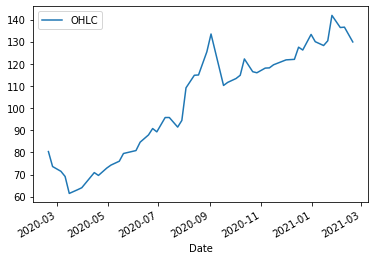

In [77]:
%matplotlib inline

graph = stock_data.plot.line(x=date_column, y='OHLC')

In [78]:
import pandas as pd
from sklearn.linear_model import LinearRegression

reg = LinearRegression()

x = pd.to_datetime(stock_data[date_column]).values.astype(float).reshape(-1, 1)
y = stock_data[['OHLC']]

model = reg.fit(x, y)

price_prediction = model.predict(x)

print(price_prediction.ravel())
print(type(price_prediction))

[ 64.80181318  65.85240607  67.95359185  69.00418474  70.05477763
  72.15596341  73.2065563   76.35833497  77.40892786  79.51011363
  80.56070652  82.6618923   83.71248519  86.86426386  87.91485675
  90.01604253  91.06663541  92.1172283   94.21841408  95.26900697
  97.37019275  98.42078564  99.47137853 101.57256431 102.6231572
 104.72434297 105.77493586 108.92671453 109.97730742 112.0784932
 113.12908609 114.17967898 116.28086476 117.33145764 119.43264342
 120.48323631 121.5338292  124.68560787 126.78679365 127.83738654
 128.88797943 130.9891652  132.03975809 134.14094387 135.19153676
 136.24212965 138.34331543 139.39390832 141.4950941 ]
<class 'numpy.ndarray'>


Text(0.5, 1.0, 'Latest 3 Months of Apple Share Price')

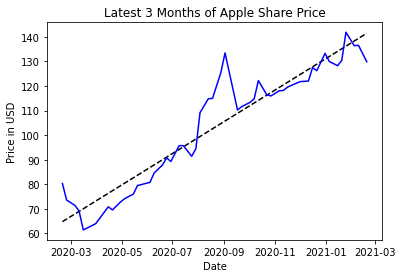

In [79]:
import matplotlib.pyplot as plt

plt.plot(stock_data[date_column], price_prediction, 'k--')
plt.plot(stock_data[date_column], stock_data['OHLC'], 'b-')
plt.xlabel('Date')
plt.ylabel('Price in USD')
plt.title('Latest 3 Months of Apple Share Price')

In [80]:
date_predict = ['2021-02-20']

x_predict = pd.to_datetime(date_predict)

y_predict = model.predict(x_predict.values.astype(float).reshape(-1, 1))

print('at {date}, the price will be around ${price}'.format(date=date_predict[0], price=round(y_predict[0][0], 2)))

at 2021-02-20, the price will be around $141.71


In [81]:
print(stock_data[date_column][0])
print(type(stock_data[date_column][0]))

2020-02-20 00:00:00
<class 'pandas._libs.tslibs.timestamps.Timestamp'>
